## Importando a base de dados

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip


!unzip -o student.zip

--2025-12-01 14:20:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘student.zip’

student.zip             [ <=>                ]  20.00K  --.-KB/s    in 0.06s   

2025-12-01 14:20:27 (324 KB/s) - ‘student.zip’ saved [20478]

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


## Visualização dos dados

In [2]:

df = pd.read_csv('student-mat.csv', sep=';')


print("Amostra dos dados (5 primeiras linhas):")
display(df.head())


print(f"\nTamanho da base de dados: {df.shape}")
print("(Isso significa: X alunos e Y características por aluno)")


print("\nTipos de dados:")
df.info()

Amostra dos dados (5 primeiras linhas):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



Tamanho da base de dados: (395, 33)
(Isso significa: X alunos e Y características por aluno)

Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non

## Tratamento dos dados





In [3]:


df_tratado = pd.get_dummies(df, drop_first=True)


print("Novas colunas com números:")
print(df_tratado.columns)

print(f"\nNovo tamanho da base: {df_tratado.shape}")



print("\nVerificando os tipos de dados:")
print(df_tratado.dtypes.unique())

Novas colunas com números:
Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

Novo tamanho da base: (395, 42)

Verificando os tipos de dados:
[dtype('int64') dtype('bool')]


## Separação dos dados

In [4]:

from sklearn.model_selection import train_test_split


X = df_tratado.drop('G3', axis=1)


y = df_tratado['G3']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dados prontos!")
print(f"O modelo vai estudar com {X_train.shape[0]} alunos.")
print(f"O modelo será testado com {X_test.shape[0]} alunos novos.")

Dados prontos!
O modelo vai estudar com 316 alunos.
O modelo será testado com 79 alunos novos.


## Treinando os modelos

In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


modelos = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Rede Neural (MLP)": MLPRegressor(max_iter=2000, random_state=42)
}

results = {}

print("Início do treinamento...\n")


for nome, modelo in modelos.items():

    modelo.fit(X_train, y_train)


    y_pred = modelo.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[nome] = r2

    print(f"--- {nome} ---")
    print(f"MAE (Erro Médio): {mae:.2f}")
    print(f"MSE (Erro Quadrático): {mse:.2f}")
    print(f"R² (Precisão Global): {r2:.4f}")
    print("-" * 30)


melhor_modelo = max(results, key=results.get)
print(f"\n🏆 O Vencedor foi: {melhor_modelo} com R² de {results[melhor_modelo]:.4f}")

Início do treinamento...

--- Regressão Linear ---
MAE (Erro Médio): 1.65
MSE (Erro Quadrático): 5.66
R² (Precisão Global): 0.7241
------------------------------
--- Random Forest ---
MAE (Erro Médio): 1.16
MSE (Erro Quadrático): 3.80
R² (Precisão Global): 0.8148
------------------------------
--- Rede Neural (MLP) ---
MAE (Erro Médio): 1.45
MSE (Erro Quadrático): 5.61
R² (Precisão Global): 0.7262
------------------------------

🏆 O Vencedor foi: Random Forest com R² de 0.8148


## Representação gráfica

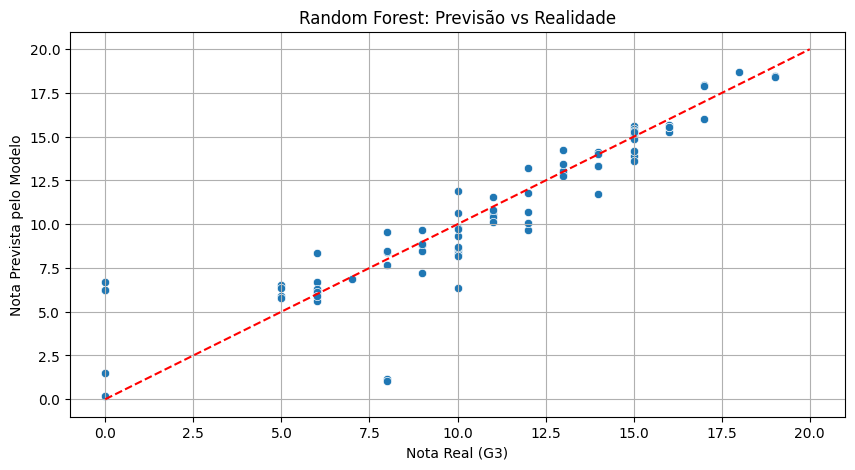

/tmp/ipython-input-261618548.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importancia, palette='viridis')


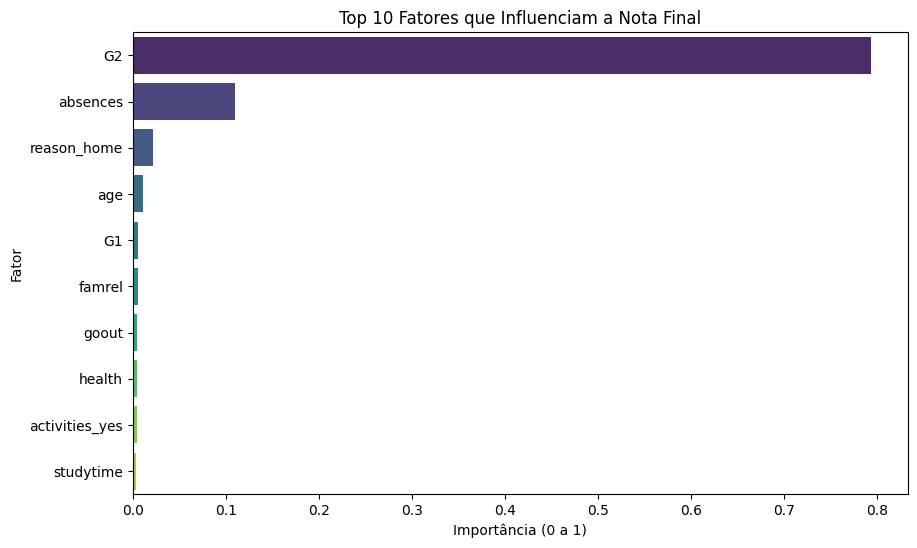

In [7]:



modelo_campeao = modelos['Random Forest']


plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=modelo_campeao.predict(X_test))
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.xlabel('Nota Real (G3)')
plt.ylabel('Nota Prevista pelo Modelo')
plt.title('Random Forest: Previsão vs Realidade')
plt.grid(True)
plt.show()


importancias = modelo_campeao.feature_importances_
nomes_colunas = X.columns


df_importancia = pd.DataFrame({'Feature': nomes_colunas, 'Importance': importancias})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False).head(10) # Top 10

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importancia, palette='viridis')
plt.title('Top 10 Fatores que Influenciam a Nota Final')
plt.xlabel('Importância (0 a 1)')
plt.ylabel('Fator')
plt.show()